# Python for Data Science

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI-Core/Python-for-Data-Science/blob/main/Part%203%20-%20Feature%20Engineering.ipynb)


## The Problem

__Loan default prediction__ is one of the most critical and crucial problems faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of _non–performing_ loans which results in a jeopardizing effect on the growth of these institutions. 

Therefore, to maintain a healthy portfolio, banks put stringent monitoring and evaluation measures in place to ensure the timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. _Delinquency_ occurs when a borrower misses a payment against his/her loan.

Given the information like mortgage details, borrowers-related details, and payment details, your objective is to build a system that can predict the defaulter status of loans for the next month given the defaulter status for the previous 12 months (in the number of months).



# Part 3 - Feature Engineering

After having performed EDA and getting an understanding of your data, it's up to you to create features from the data based on this understanding. 
This process of creating new features is known as _feature engineering_.

Feature engineering is one of the most crucial steps in machine learning.
Creating the right features by applying __data understanding__ and __business knwoledge__ can improve the overall performance metrics by leaps and bounds. 

## Computing new features

The typical approach is to generate a huge amount of different features using a variety of strategies.
- Some of these features can be crafted by your intuition.
- Some of these features can be informed by your interpretion of your EDA.
- Some of these features can be generated by making random transformations and combinations of features which can end up being very valuable to the model. So you can choose to be creative here.

### Features that make sense intuitively

One idea is to calculate the number of months since their first payment and the start of their loan.

In [31]:
# number of days before the first payment from the originations date
df['months_until_first_payment'] = (df['first_payment_date'] - df['origination_date'])//pd.Timedelta('29 days') # this will give us the number of months, dividing by 29 to cover corner case of February

Intuitively, there's probably not much more information contained in the exact number of days given to pay back the loan than there is in the number of months. Perhaps simplifying this value will make it easier to learn some useful relationships.

Note: There is no point in keeping the both loan term in days and loan term in months as features, as they are completely dependent on one another. Here, we assume that this simplification will be helpful, and can discard the less helpful feature based on days.

In [29]:
# converting loan term into number of months, diving by 29 to cover the corner case of Feb 
df['loan_term'] =  df['loan_term'] // 29 

Another piece of business logic that makes sense if you know about loans work, is to determine whether the individual has taken insurance for the loan. In unforeseen circumstances, the insurance policy provides coverage for a certain amount of time and repays the monthly loan payments to be made by the individual.
Instead of just knowing the percentage of insurance, it would be beneficial just to know if a __person has insurance or not__.

In [30]:
#loan insurance covered Yes/No
df['has_insurance'] = df['insurance_percent'].apply( lambda x :  0 if x == 0 else 1)

Take a look at these features in your dataset now that you've created them.

In [32]:
df.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,has_insurance,months_until_first_payment
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,12,2012-03-01,2012-05-01,95,1,22.0,694.0,C86,30.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,2
672831657627,Y,"Swanson, Newton and Miller",4.875,144000,12,2012-01-01,2012-03-01,72,1,44.0,697.0,B12,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2
742515242108,Z,Thornton-Davis,3.250,366000,6,2012-01-01,2012-03-01,49,1,33.0,780.0,B12,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
601385667462,X,OTHER,4.750,135000,12,2012-02-01,2012-04-01,46,2,44.0,633.0,B12,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,2
273870029961,X,OTHER,4.750,124000,12,2012-02-01,2012-04-01,80,1,43.0,681.0,C86,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,0,2


## Feature Selection

Now that you've created a bunch of new features, you need to determine which ones to use.
There are different approaches for different types of variables. 


The most common approaches are:
1. Correlation Coefficient: a metric used to find out the [correlation](https://en.wikipedia.org/wiki/Correlation) betwen continous variables. 
2. Chi-Squared test: test of independence for categorical columns.

### 1. Using Correlation Coefficients to Remove Highly Correlated Features
As we mentioned, we typically use this for continous variables, but sometimes interesting patterns can be seen for categorical variables as well.

So let's visualise the correlation between all the columns.

In [34]:
# correlation for continous columns

continuous_columns = [
    "interest_rate",
    "unpaid_principal_bal",
    "loan_term",
    "loan_to_value",
    "debt_to_income_ratio",
    "borrower_credit_score",
    "insurance_percent",
    "days_until_first_payment"
]

categorical_columns = [
    "source",
    "financial_institution",
    "loan_purpose",
    "has_insurance",
    "m1",
    "m2",
    "m3",
    "m4",
    "m5",
    "m6",
    "m7",
    "m8",
    "m9",
    "m10",
    "m11",
    "m12"
]

corr = df.corr()

fig = px.imshow(corr, text_auto=True, aspect="auto")
fig.show()


What we're looking for here is the more yellow cells (but not along the diagonal), which indicate a high correlation between two features.

- `interest_rate` and `loan_term` is highly correlated. The more the loan term , the more the interest rate. 
- `has_insurance` and `insurance_percent` are also very highly correlated because `has_insurance` is derived from `insurance_percent`.

We should remove either one of the columns in both the cases.


### 2. Using a Chi-Squared Test to Remove Highly Correlated Categorical Features

A [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test) test is a [statistical hypothesis](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) test primarily used to examine whether two categorical variables are independent in influencing the test statistic.

In [35]:

from scipy.stats import chi2_contingency

In [33]:
results = pd.DataFrame(columns=['col','p-value'])

for col in categorical_columns:
    _, p, _, _ = chi2_contingency( pd.crosstab(df[col], df['m13']))
    s = results.shape[0]
    results.loc[s,'col'] = col
    results.loc[s,'p-value'] = p

results

,col,p-value
0,source,0.000795
1,financial_institution,0.061209
2,loan_purpose,0.0
3,insurance_covered,0.064511
4,m1,0.0
5,m2,0.0
6,m3,0.0
7,m4,0.0
8,m5,0.0
9,m6,0.0


Typically, a p-value < 0.05 is considered significant. Hence, insignificant columns are:
1. financial_institution
2. insurance_covered

Now let's drop those categorical columns which we found to be insignificant.

In [37]:
df = df.drop(labels=['financial_institution', 'has_insurance', 'insurance_percent'], axis=1)

We will also drop the datetime columns because they dont provide any value unless we extract some information from them like `months_until_first_payment`. You can try an extract as much information from them as you want like `month_name` when loan was issued etc.
For now, we will drop these columns as well. 

In [39]:
df = df.drop(labels=["origination_date","first_payment_date"], axis=1)

# Data Preprocessing

There are a few data preprocessing techniques that need to be applied specifically if you intent to use your data for machine learning. They include:

1. Feature Encoding
2. Feature Scaling


## Feature and Label Encoding
There are generally 2 types of encoding techniques 
1. Label Encoding - used for ordinal variables
2. One-Hot Encoding : used for nominal variables


In [42]:
# dropping non significant columns from X and the target column
X = df
y = df.drop(labels=['m13'], axis= 1)


In [43]:
# apply one-hot encoding to nominal variables
X = pd.get_dummies(data=X, columns=['source', 'loan_purpose'])

## Feature Scaling

*Feature scaling* is the process of making all features on the same order of magnitude, rather than having some that are 1000x larger than others, for example.

Feature scaling is one of the most important data preprocessing step in machine learning. Algorithms that compute the distance between the features are biased significantly by numerically larger values if the data is not scaled.

Tree-based algorithms are fairly insensitive to the scale of the features. Also, feature scaling helps machine learning models trained using gradient based optimisation (including deep learning algorithms) converge and converge faster.

Normalization and standardization are the most popular scaling techniques.

### Normalisation

Normalisation, also known as min-max scaling, is calculated as:

# $X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$

This scales the range to [0, 1]. Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube.
Normalization is useful when there are no outliers, as it cannot cope with them.
Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform

### Standardisation

Standardisation, also known as Z-Score Normalization, is the transformation of features by subtracting the mean of the data and dividing by its standard deviation.
The resulting value for each feature is often called a Z-score.

# $X_{new} = \frac{X - \mu}{\sigma}$

Standardization can be helpful in cases where the data follows a Gaussian distribution. 
However, this does not have to be necessarily true. 
Geometrically speaking, it translates the data to centre it around its original mean and squishes or expands the points around that mean so that it has a unit standard deviation in every direction.
We are just changing mean and standard deviation to those of a normal distribution, thus the shape of the original distribution is not affected.

Standardisation can handle outliers because the range of the new data is not completely determined by the max and min values.


In [44]:
X

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,months_until_first_payment,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,
268055008619,4.250,214000,12,95,1,22.0,694.0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,1
672831657627,4.875,144000,12,72,1,44.0,697.0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,1,0
742515242108,3.250,366000,6,49,1,33.0,780.0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0
601385667462,4.750,135000,12,46,2,44.0,633.0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,0,0,0,1,0
273870029961,4.750,124000,12,80,1,43.0,681.0,0,1,2,3,4,5,6,7,8,9,10,11,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382119962287,4.125,153000,12,88,2,22.0,801.0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0
582803915466,3.000,150000,4,35,1,37.0,796.0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0
837922316947,3.875,166000,12,58,2,49.0,724.0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0


In [45]:
# apply normalisation using sklearn
from sklearn.preprocessing import MinMaxScaler
normalisation = MinMaxScaler()
X = normalisation.fit_transform(X)

## Key Takeaways

- Feature engineering is about coming up with new features that might contain useful information
- Feature scaling is important because some machine learning models will struggle to find the patterns in your data without it
- Normalisation and standardisation are two of the most popular approaches to feature scaling

# Part 4 - Model Training and Evaluation

Now, it's time to do some machine learning.
You have your final training and testing data, and you're ready to start training different some machine learning models to model the relationships between the features and labels.

## Train Test Split

The final thing required before training a machine learning model on our data is to split the data into different sets.
training and testing for model training and evaluation. 

You can learn more about why we perform train and test splitting [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify to have same ratio in train and test split for target column

Alright, so we are getting closer to training our mdodel. This notebook was just focussed around preparing the data before we actually train the model. We did Feature Selection, Feature Encoding and then Feature Scaling. It is important to notice the flow of the preprocessing steps. It should most likely happen in this manner if not always.

### Model Training 

We will be training different models and see which works best. 
1. Logistic Regression : For this model, how to prepare the data w.r.t outliers, feature scaling and feature encoding ? 
2. Decision Tree : How to prepare the data for this model ? Is it robust to outliers ? 
3. Random Forest : [Read More Here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
4. SVM : [Read More Here](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.)
5. Boosting Models: GradientBoostingClassifier(), ExtraTreesClassifier()

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [48]:
# Train Logistic Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

These metrics help us understand which model works better over others. You can learn more about the metrics here: [Link](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide#:~:text=They're%20used%20to%20train,t%20need%20to%20be%20differentiable.)
1. Accuracy : Is Accuracy as a metric relavant here ?
2. Precision : [Read More](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
3. Recall : [Read More](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
4. Confusion Matrix

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score
pred = model.predict(X_test)
print (f"The accuracy is {accuracy_score(y_test, pred)}")

The accuracy is 0.9952897926359929


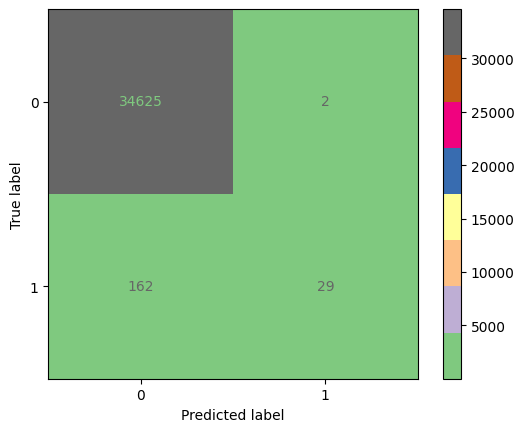

In [53]:
plot_confusion_matrix(model,X_test, y_test, cmap='Accent')

In [54]:
print("Classification report:")
print(classification_report(pred, y_test))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34787
           1       0.15      0.94      0.26        31

    accuracy                           1.00     34818
   macro avg       0.58      0.97      0.63     34818
weighted avg       1.00      1.00      1.00     34818



Implement a __evaluation()__ function to evaluate the metrics mentioned above 

In [55]:
def evaluate(model, verbose=False):
    """
    Set verbose = True to print accuracy, classification report and plot
    confusion matrix
    """
    metrics = {}
    pred = model.predict(X_test)
    metrics['accuracy'] = accuracy_score(y_test, pred)
    verbose and print (f"The accuracy is {metrics['accuracy']}")
    verbose and plot_confusion_matrix(model,X_test, y_test)
    metrics['precision'] = precision_score(y_test, pred)
    metrics['recall'] = recall_score(y_test, pred)
    verbose and print (f"The classification report looks like : \n {classification_report(pred, y_test)}")
    return metrics
    

The accuracy is 0.9957493250617496
The classification report looks like : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34725
           1       0.36      0.73      0.48        93

    accuracy                           1.00     34818
   macro avg       0.68      0.86      0.74     34818
weighted avg       1.00      1.00      1.00     34818



{'accuracy': 0.9957493250617496,
 'precision': 0.7311827956989247,
 'recall': 0.35602094240837695}

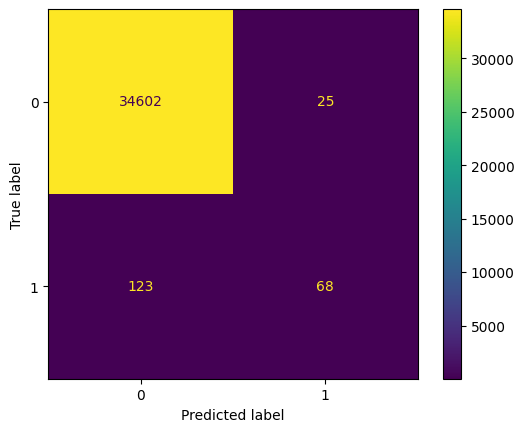

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
evaluate(random_forest, verbose = True)


In [57]:
output = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall'])

def train_model(model):
    global output
    model.fit( X_train, y_train) #X_train and y_train are used globally
    metrics = evaluate(model)
    metrics["model"] = f"{model}"
    output = output.append(metrics, ignore_index=True)
    

In [58]:
for model in [RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), KNeighborsClassifier()]:
    print (f"Training model: {model}" )
    train_model(model)
    

Training model: RandomForestClassifier()
Training model: GradientBoostingClassifier()
Training model: ExtraTreesClassifier()
Training model: KNeighborsClassifier()


In [59]:
output

,model,accuracy,precision,recall
0,RandomForestClassifier(),0.995807,0.741935,0.361257
1,GradientBoostingClassifier(),0.995778,0.729167,0.366492
2,ExtraTreesClassifier(),0.995749,0.721649,0.366492
3,KNeighborsClassifier(),0.994802,0.750000,0.078534


If we consider __Recall__ `GradientBoostinClassifier` is working better than other models in default configuration. Lets improve the function to automatically determine the best model

In [60]:
output = pd.DataFrame(columns=['model','accuracy','precision','recall'])

def train_model(model):
    global output
    model.fit( X_train, y_train) #X_train and y_train are used globally
    metrics = evaluate(model)
    metrics["model"] = f"{model}"
    output = output.append(metrics, ignore_index=True)

def select_best(model_list):
    for model in model_list:
        print ("Training Model: ", model)
        train_model(model)
    output.recall = output.recall.astype('float64')
    print (f"The best model is \n { output.loc[[output.recall.argmax()]]}")

In [61]:
select_best([
    RandomForestClassifier(),
    GradientBoostingClassifier(), 
    ExtraTreesClassifier(), 
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC() 
])

Training Model:  RandomForestClassifier()
Training Model:  GradientBoostingClassifier()
Training Model:  ExtraTreesClassifier()
Training Model:  KNeighborsClassifier()
Training Model:  LogisticRegression()
Training Model:  SVC()
The best model is 
                     model  accuracy  precision    recall
2  ExtraTreesClassifier()  0.995749   0.704762  0.387435


In [62]:
output

,model,accuracy,precision,recall
0,RandomForestClassifier(),0.995864,0.752688,0.366492
1,GradientBoostingClassifier(),0.995778,0.729167,0.366492
2,ExtraTreesClassifier(),0.995749,0.704762,0.387435
3,KNeighborsClassifier(),0.994802,0.750000,0.078534
4,LogisticRegression(),0.995290,0.935484,0.151832
5,SVC(),0.994974,0.944444,0.089005


In [63]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

### Saving the Model

So you're happy with your model? Now you need to save it.

Once it's saved, we can share it with our team, load it back in to make predictions in some other system, or load it back in to compare with new models that you train, for example.

In [119]:
import joblib 
filename = 'finalized_model.pkl'
joblib.dump(model, filename)


['finalized_model.sav']

## Key Takeaways
- The process for model training and evaluation goes as follows
    - Train a model on the training set
    - Evaluate the model on the validation set
    - Repeat for as many variations of model as you can
    - Select the best model based on its performance on the validation set
    - Report the performance of the model using the test set, but do not use this to make any decisions about the model!
- Never use the test set to choose between models. The moment you pick a model based on test set performance, you're showing it the answers!
- Both the validatoin and test set are a measure of how well the model will generalise to unseen examples
- The validation set is used to compare different models and choose between them once they've been trained
- The difference 
- This demo barely scratches the surface. Going forward, you could explore:
    - the settings of the different models we've experimented with, which are known as hyperparameters
    - other machine learning models, such as deep learning models like neural networks
    - other machine learning libraries, like Apache Spark's MLLib
    - other preprocessing techniques
